In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
data_train = pd.read_csv("/content/drive/MyDrive/train.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
#survived  = target

In [32]:
data_train.replace(["female" , "male"] , [0 , 1] , inplace=True)

In [33]:
data_train.fillna(0 , inplace=True)
data_train = data_train.drop(["Name" , "Ticket" , "Cabin"], axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [35]:
X_train = np.array(data_train[["Pclass" , "Sex" , "Age" , "SibSp" , "Parch" , "Fare"]])
Y_train = np.array(data_train[["Survived"]])

# model

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6  , activation="sigmoid"), #input layer
    tf.keras.layers.Dense(20  , activation="relu"),
    tf.keras.layers.Dense(8  , activation="sigmoid"),
    tf.keras.layers.Dense(2  , activation="softmax"),
])

In [38]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001) , loss=tf.keras.losses.sparse_categorical_crossentropy ,metrics=["accuracy"])

In [ ]:
output = model.fit(X_train  , Y_train , epochs= 150)

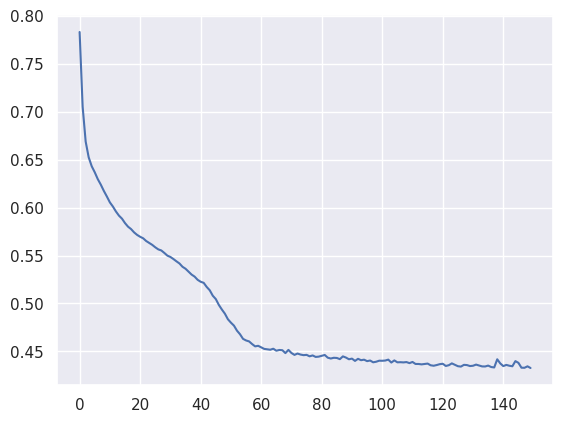

In [41]:
plt.plot(output.history["loss"])
plt.show()

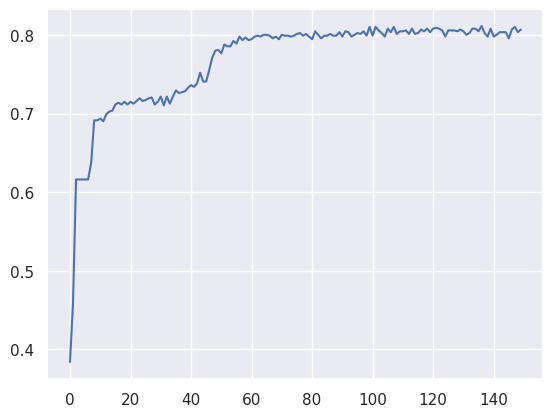

In [42]:
plt.plot(output.history["accuracy"])
plt.show()